In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Step 1: Load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
print(df.head(5))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
# Step 2: Preprocess the data
# Convert 'Gender' to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
# Extract features
features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Step 3: Determine the number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

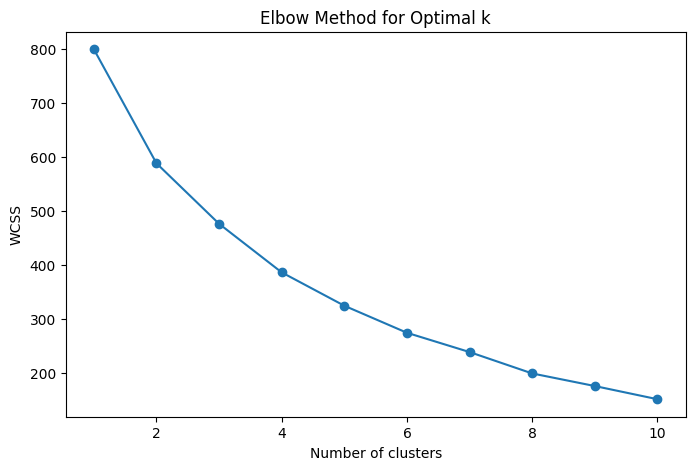

In [ ]:
# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Step 4: Apply K-means with the optimal number of clusters
optimal_k = 4  # Adjust this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(features_scaled)

In [ ]:
# Step 5: Evaluate and interpret results
# Display the cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (Original Scale):")
print(pd.DataFrame(centers, columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']))


Cluster Centers (Original Scale):
   Gender        Age  Annual Income (k$)  Spending Score (1-100)
0     1.0  28.392857           60.428571               68.178571
1     0.0  49.437500           62.416667               29.208333
2     1.0  47.803571           58.071429               34.875000
3     0.0  28.250000           62.000000               71.675000


In [ ]:
# Display the clustered DataFrame
print("\nClustered DataFrame:")
print(df.head())



Clustered DataFrame:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  
0        3  
1        3  
2        2  
3        0  
4        2  


In [ ]:
# Extract cluster centers
centroids = kmeans.cluster_centers_

In [ ]:
# Inverse transform centroids to original scale
centroids_original = scaler.inverse_transform(centroids)

In [ ]:
# Plotting the clusters and centroids
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

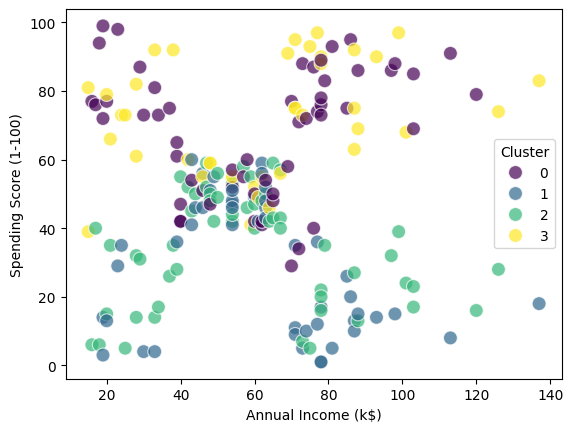

In [ ]:
# Scatter plot for data points
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
